### Objetivo: criar modelos de classificação com os algoritmos decision tree e regressão logística, que prevejam a expectativa de vida (Baixa, Média e Alta) de um país.

#### 1º - Importar libs

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # para estimar os betas


# Pacotes de machine learning

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree

#### 2º - Importar dados

In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/Supervised-Learning/master/world_data.csv')

In [57]:
df.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000


#### 3º - Verificar se os data types estão corretos

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          194 non-null    object 
 1   happiness        140 non-null    float64
 2   income           193 non-null    float64
 3   lifeexp          187 non-null    float64
 4   sanitation       194 non-null    float64
 5   water            194 non-null    float64
 6   urbanpopulation  119 non-null    float64
 7   unemployment     112 non-null    float64
 8   literacy         149 non-null    float64
 9   inequality       160 non-null    float64
 10  murder           93 non-null     float64
 11  energy           169 non-null    float64
 12  childmortality   193 non-null    float64
 13  fertility        184 non-null    float64
 14  hiv              149 non-null    float64
 15  foodsupply       168 non-null    float64
 16  population       194 non-null    int64  
dtypes: float64(15), 

#### 4º - Fazer o summary dos dados

In [59]:
df.describe()

,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
count,140.000000,193.000000,187.000000,194.000000,194.000000,119.000000,112.00000,149.000000,160.000000,93.000000,169.000000,193.000000,184.000000,1.490000e+02,168.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,24.322185,1.90881,81.573826,38.579375,4.953132,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,1.123605,19122.183694,7.605557,29.269367,17.568245,15.569400,2.04772,19.476814,7.995857,10.261882,2806.613656,31.319236,1.372184,6.304909e+05,444.201818,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,3.880000,0.01820,25.300000,16.600000,0.057800,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.610368,3290.000000,66.050000,49.225000,77.900000,13.450000,0.58675,70.300000,32.775000,0.660000,563.000000,8.200000,1.777500,7.600000e+03,2505.000000,1.982500e+06
50%,5.331034,11000.000000,73.300000,87.900000,94.950000,20.500000,1.25000,90.000000,37.450000,1.400000,1250.000000,17.700000,2.335000,2.400000e+04,2825.000000,8.435000e+06
75%,6.257746,24100.000000,77.500000,97.700000,99.300000,29.000000,2.16500,97.400000,43.125000,4.820000,2710.000000,49.500000,3.842500,1.300000e+05,3200.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,10.70000,100.000000,63.000000,77.600000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


#### 5º - Verificar a porcentagem de valores vazios em cada coluna

In [60]:
df.isna().mean()

country            0.000000
happiness          0.278351
income             0.005155
lifeexp            0.036082
sanitation         0.000000
water              0.000000
urbanpopulation    0.386598
unemployment       0.422680
literacy           0.231959
inequality         0.175258
murder             0.520619
energy             0.128866
childmortality     0.005155
fertility          0.051546
hiv                0.231959
foodsupply         0.134021
population         0.000000
dtype: float64

#### 6º - Preencher os valores nulos com mean imputation de cada coluna

In [61]:
    # Pegar um df só com colunas numéricas
    
df2 = df.drop(['country'], axis=1)

    # Fazer a média de todas as colunas do df
    
mean_cols = df2.mean()

    # Transformas as médias em dicionário
    
mean_cols = mean_cols.to_dict()

    # Fazer a mean imputation nos valores vazios dessas colunas
    
for i in mean_cols:
     df[i] = df[i].fillna(value = mean_cols[i])
    
    # Verificar se os vazios foram preenchidos
    
df.isna().mean()

country            0.0
happiness          0.0
income             0.0
lifeexp            0.0
sanitation         0.0
water              0.0
urbanpopulation    0.0
unemployment       0.0
literacy           0.0
inequality         0.0
murder             0.0
energy             0.0
childmortality     0.0
fertility          0.0
hiv                0.0
foodsupply         0.0
population         0.0
dtype: float64

#### 7º - Boxplot das variáveis

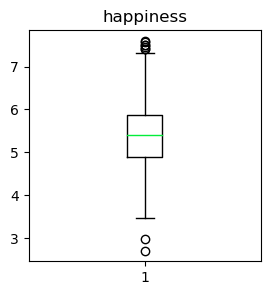

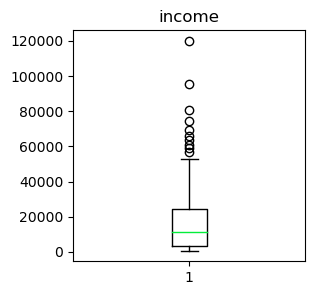

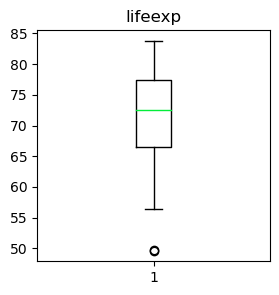

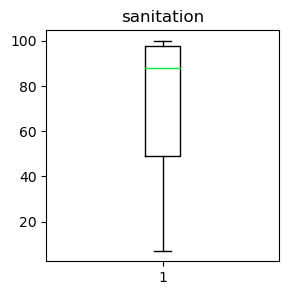

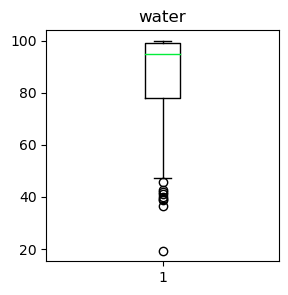

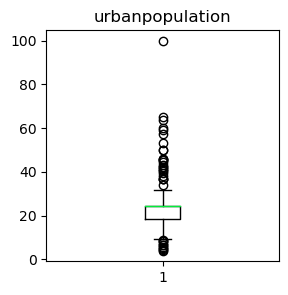

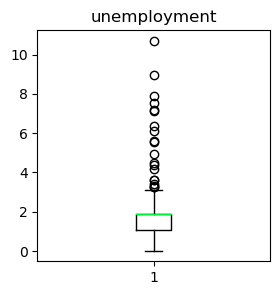

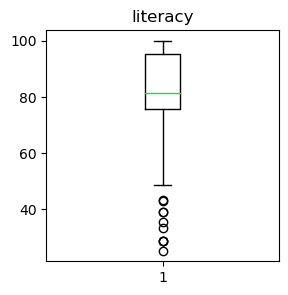

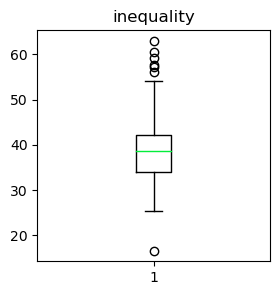

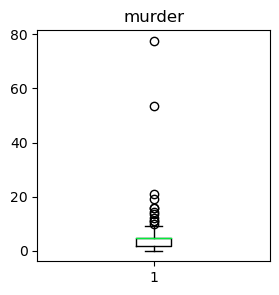

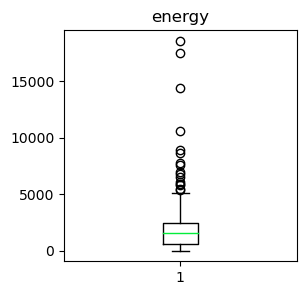

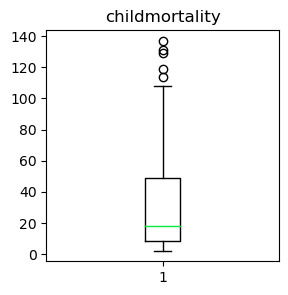

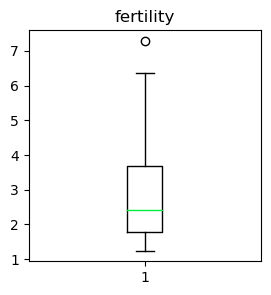

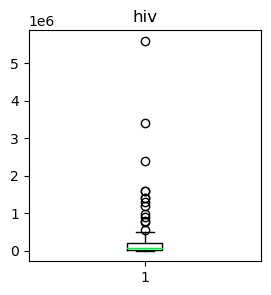

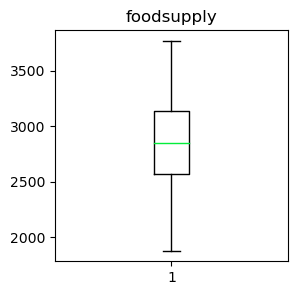

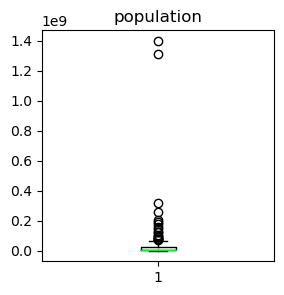

In [62]:
    # Pegar um df só com colunas numéricas
    
df2 = df.drop(['country'], axis=1)

    # Fazer os boxplots
    
for i in df2.columns:
     plt.figure(figsize=(3,3))
     plt.style.use('seaborn-bright')
     plt.boxplot(df2[i])
     plt.title(i)
     plt.show()      

#### 8º - Histograma das variáveis

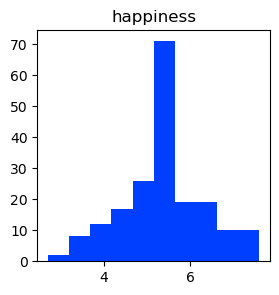

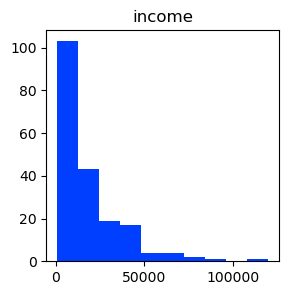

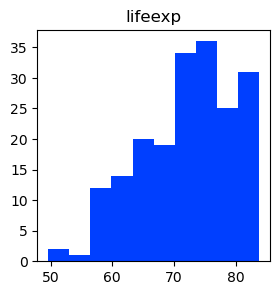

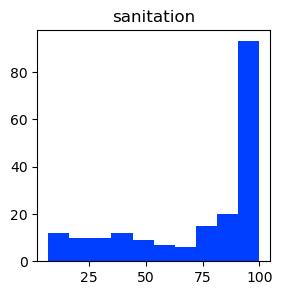

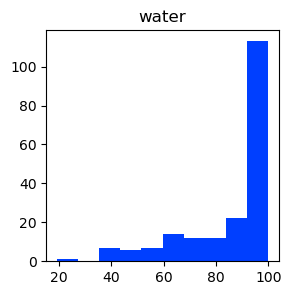

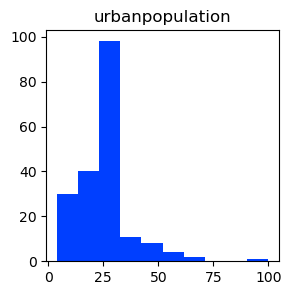

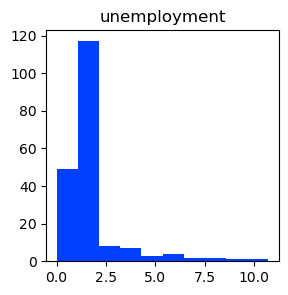

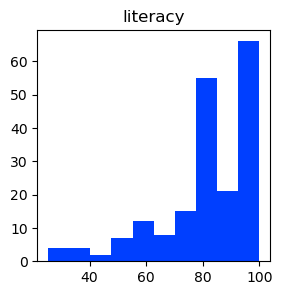

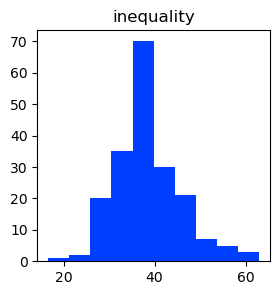

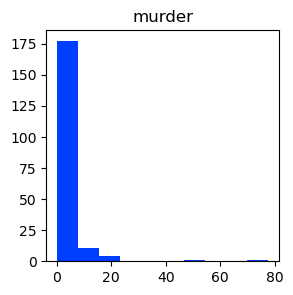

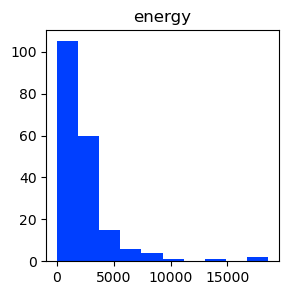

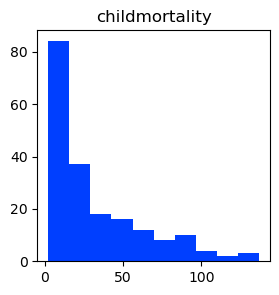

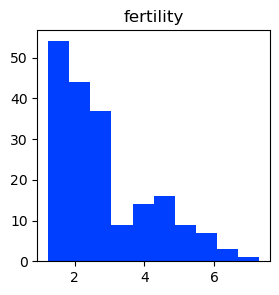

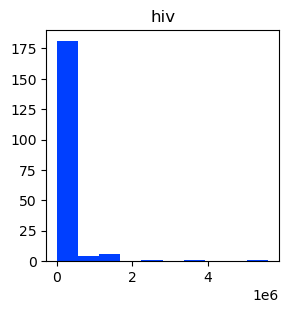

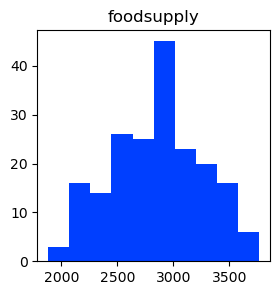

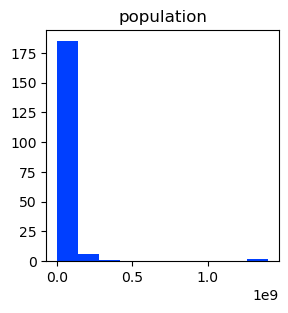

In [63]:
    # Pegar um df só com colunas numéricas
    
df2 = df.drop(['country'], axis=1)

    # Fazer os boxplots
    
for i in df2.columns:
     plt.figure(figsize=(3,3))
     plt.style.use('seaborn-bright')
     plt.hist(df2[i])
     plt.title(i)
     plt.show()  

#### 9º - Fazer a matriz de correlação

<AxesSubplot:>

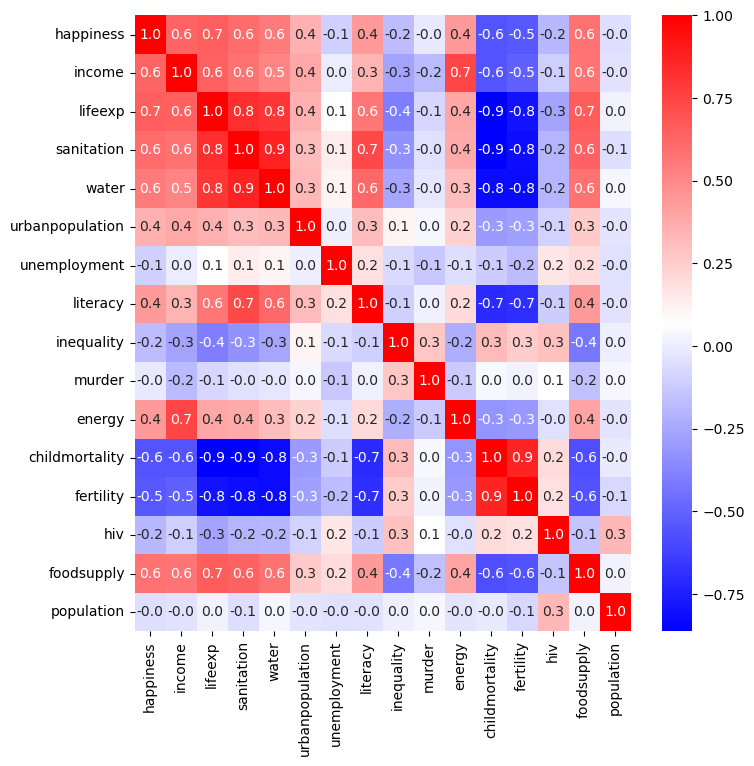

In [64]:
    # Fazendo a correlação
    
correl_matrix = df.corr()

    # Criando a figura. Obs.: não é necessário, mas fiz pq queria a figura maior
    
plt.figure(figsize=(8,8))
    
    # Criando o heatmap. Obs.: annot = info na cél, fmt = formato do nº, cmap = paleta de cores
    
sns.heatmap(correl_matrix, annot = True, fmt=".1f", cmap = 'bwr')

#### 10º - Fazer o binning de life exp, de acordo com a frequência

In [65]:
        # Transformar a coluna lifeexp em bin. Obs.: qcut divide em bins de tamanho similar
    
df['lifeexp_bin'] = pd.qcut(df['lifeexp'], q=3, precision=1, labels = ['Baixa', 'Média','Alta'])

        # Conferir se a nova coluna tem valores vazios
    
df['lifeexp_bin'].isna().value_counts()

        # Verificar se os bins tem quantidades similares
    
df['lifeexp_bin'].value_counts()

Baixa    65
Alta     65
Média    64
Name: lifeexp_bin, dtype: int64

#### 11º - Selecionar as variáveis X e y

In [66]:
y = df['lifeexp_bin']
X = df[['happiness', 'income', 'sanitation', 'water',
       'urbanpopulation', 'unemployment', 'literacy', 'inequality', 'murder',
       'energy', 'childmortality', 'fertility', 'hiv', 'foodsupply',
       'population']]

#### 12º - Fazer a reescala de X, através da forma Min Max.

In [67]:
    # Refazer a escala (de 0 a 1)
    
scaler = MinMaxScaler(feature_range = (0,1))

    # Transformar o X de acordo com a nova escala
    
rescaledX = scaler.fit_transform(X)

    # Atribuir os novos valores de X como dataframe ao X
        # Obs.: columns = X.columns, deixa os títulos das colunas como texto ao invés de número
        
X = pd.DataFrame(rescaledX, columns = X.columns)

    # Data frame X reescalado

X.describe()

,happiness,income,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.549625,0.140813,0.718449,0.830600,0.212674,0.176994,0.753331,0.473693,0.063131,0.116950,0.216925,0.263789,0.038917,0.511086,0.027044
std,0.194528,0.159768,0.314995,0.217698,0.126654,0.145381,0.228323,0.156411,0.091370,0.140854,0.231736,0.220853,0.098593,0.218624,0.101406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.446821,0.022404,0.453562,0.726146,0.149501,0.099871,0.673025,0.375000,0.021178,0.032539,0.044510,0.090909,0.001820,0.365079,0.001408
50%,0.549625,0.087345,0.869780,0.937423,0.212674,0.176994,0.753331,0.473693,0.063131,0.083668,0.116469,0.194215,0.012489,0.511086,0.006017
75%,0.648486,0.196663,0.975248,0.991326,0.212674,0.176994,0.938086,0.551185,0.063131,0.129928,0.348850,0.404545,0.038917,0.666667,0.019582
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 13º - Separar os dados para teste e treino

In [68]:
test_size = 0.33    # 1/3 da amostra será usado para verificar a precisão do modelo

seed = 1    # Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

### Decision Tree

#### 14º - Decision Tree - Criar um modelo com o algoritmo

In [69]:
    # Criar o modelo que será treinado
    
model_dt = DecisionTreeClassifier()

    # Treinar o modelo, com as respostas corretas

model_dt.fit(X_train, y_train)

    # Checar o desempenho do modelo com as informações de treino

predictions_dt = model_dt.predict(X_train) # descobrindo os valores de y train, através de X train
dt_as_treino = accuracy_score(y_train, predictions_dt) # comparando y train (true value) com y train (de predictions)

    # Avaliar o modelo com as informações de teste

predictions_dt = model_dt.predict(X_test) # descobrindo os valores de y test, através dos valores de X test
dt_as_teste = accuracy_score(y_test, predictions_dt) # comparando y test (true value) com y test (de predictions)

    # Resumo

print(f'=> Decision tree\n'
      + '\n'
      + f'Accuracy Score do modelo com as informações de treino é {dt_as_treino}.\n'
      + f'Accuracy Score do modelo com as informações de teste é {dt_as_teste}.\n')

=> Decision tree

Accuracy Score do modelo com as informações de treino é 1.0.
Accuracy Score do modelo com as informações de teste é 0.7384615384615385.



#### 15º - Descobrir a importância de cada variável no algoritmo de Decision Tree

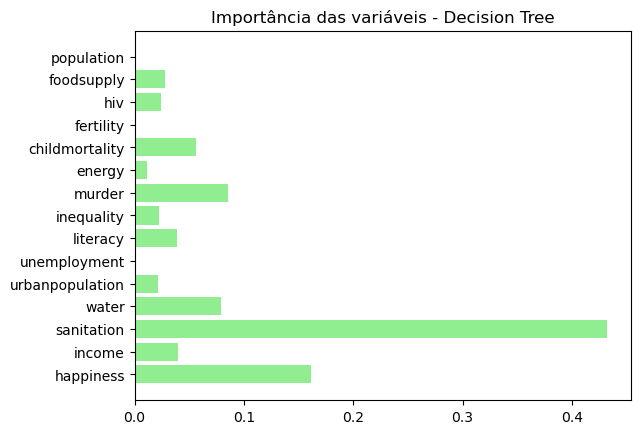

In [70]:
plt.barh(X.columns, model_dt.feature_importances_, color = 'lightgreen')
plt.title('Importância das variáveis - Decision Tree')
plt.show()  

#### 16º - Visualizar a Decision tree

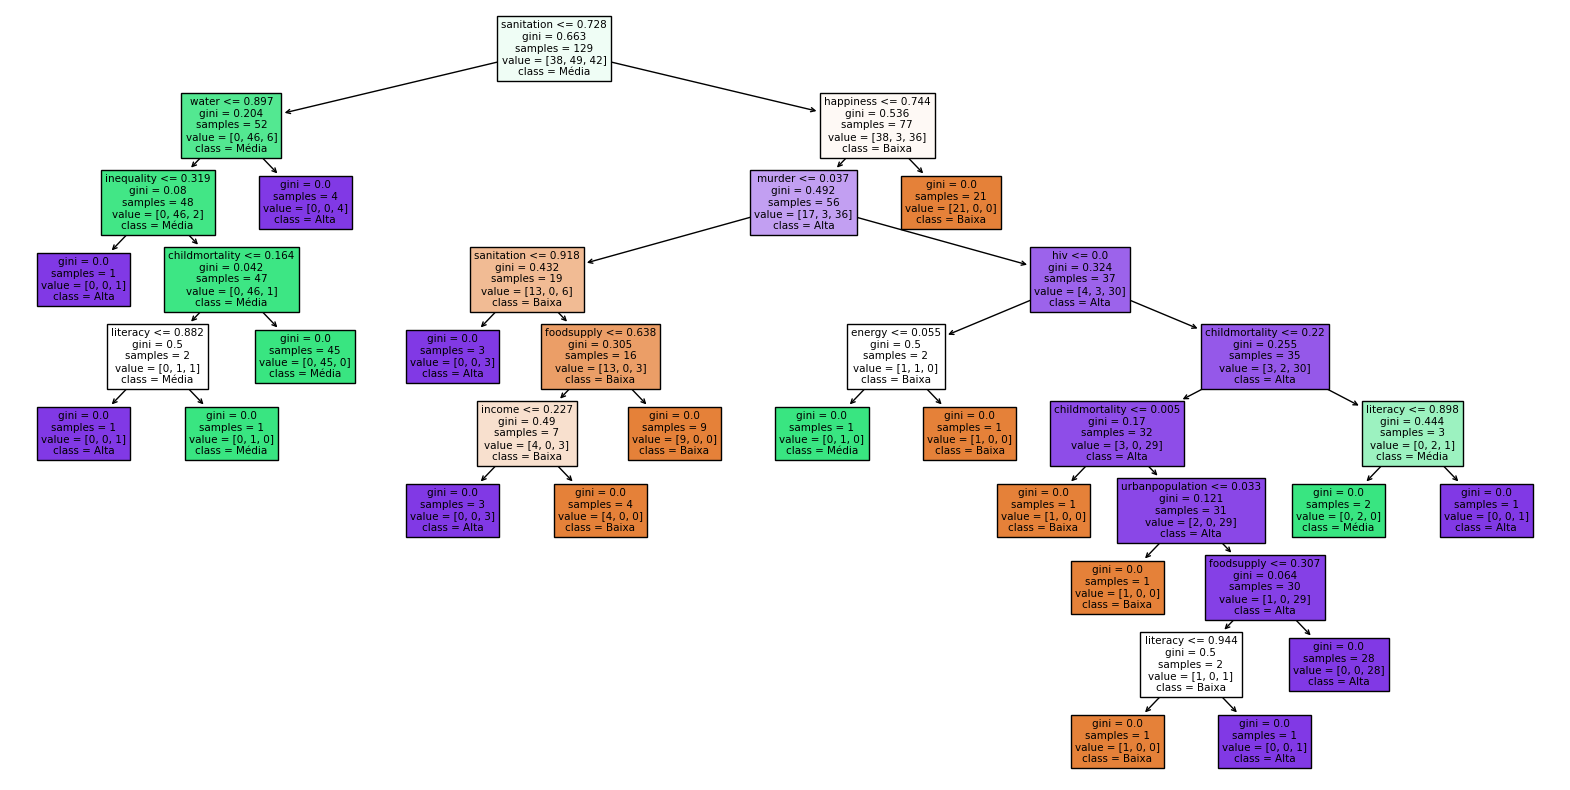

In [71]:
target_names = ['Baixa', 'Média','Alta'] # são os valores de y
feature_names = X.columns # são os valores de  X


fig = plt.figure(figsize=(20,10))
tree_plot = tree.plot_tree(model_dt,
                           feature_names = feature_names,
                           class_names = target_names,
                           filled = True)

### Regressão logística

#### 17º - Regressão logística - Criar um modelo com o algoritmo

In [72]:
    # Criar o modelo, que será treinado
    
model_rl = LogisticRegression()

    # Treinar o modelo

model_rl.fit(X_train, y_train)

    # Checar o desempenho do modelo com as informações de treino

predictions_rl = model_rl.predict(X_train)
rl_as_treino = accuracy_score(y_train, predictions_rl)

    # Avaliar o modelo com as informações de teste

predictions_rl = model_rl.predict(X_test) # descobrindo os valores de y test, através dos valores de X test
rl_as_teste = accuracy_score(y_test, predictions_rl) # comparando y test (true value) com y test (de predictions)

    # Resumo

print(f'=> Regressão logística\n'
      + '\n'
      + f'Accuracy Score do modelo com as informações de treino é {rl_as_treino}.\n'
      + f'Accuracy Score do modelo com as informações de teste é {rl_as_teste}.\n')

=> Regressão logística

Accuracy Score do modelo com as informações de treino é 0.8294573643410853.
Accuracy Score do modelo com as informações de teste é 0.7230769230769231.



#### 18º - Descobrir a importância de cada variável no algoritmo de Regressão Logística

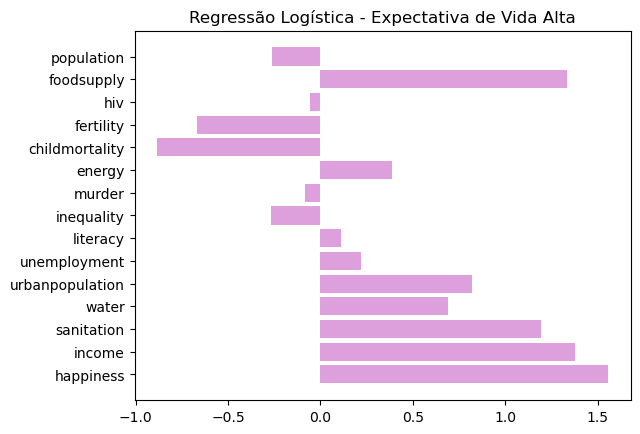

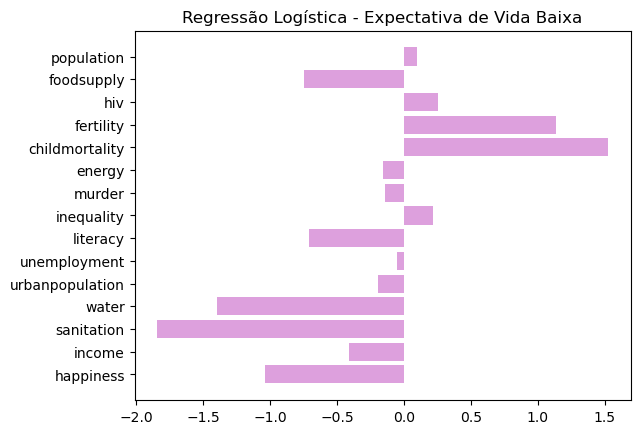

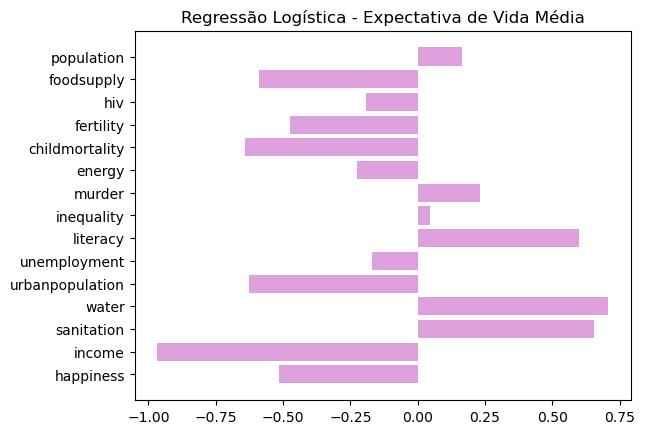

In [73]:
for i,c in enumerate(model_rl.classes_):
    plt.barh(X.columns, model_rl.coef_[i],color='plum') # são os coeficientes
    plt.title(f'Regressão Logística - Expectativa de Vida {c}')
    plt.show()

#### 19º - Visualizar gráficos de Regressão Logística

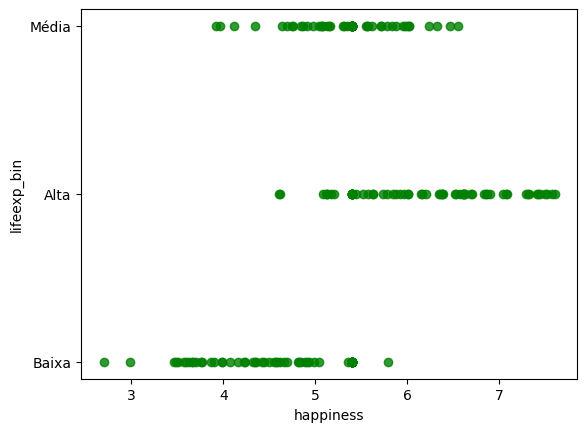

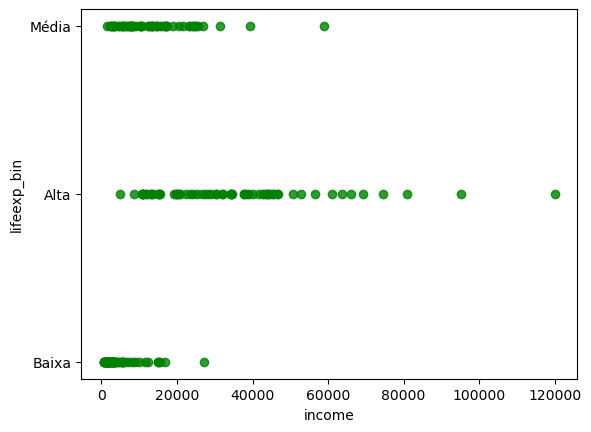

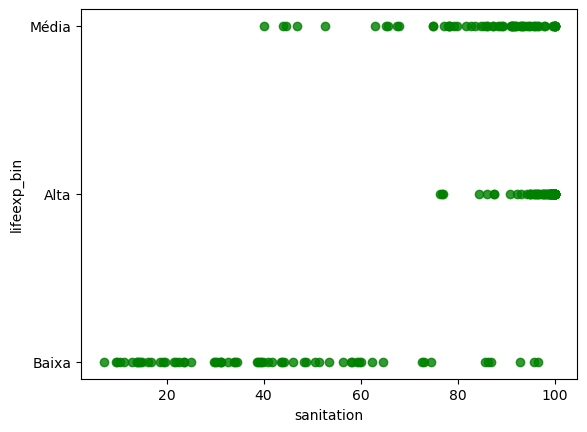

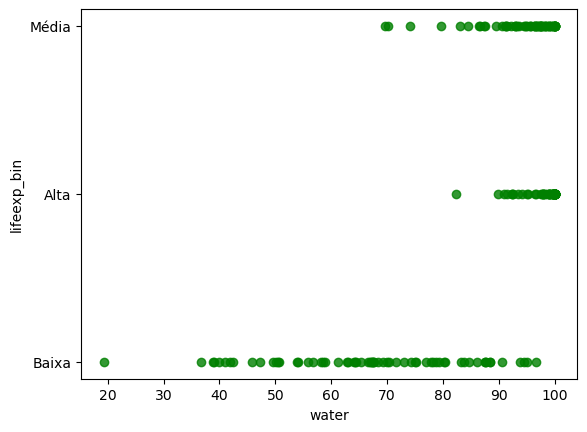

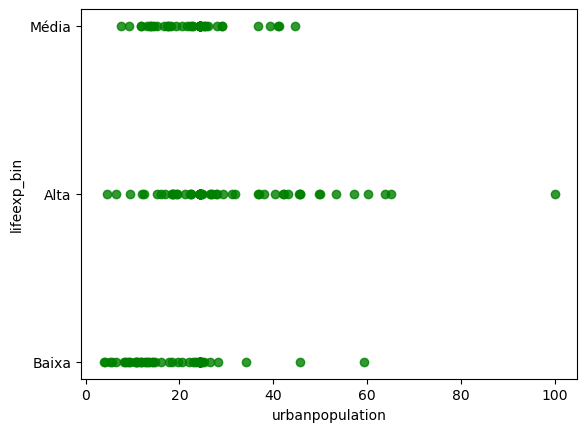

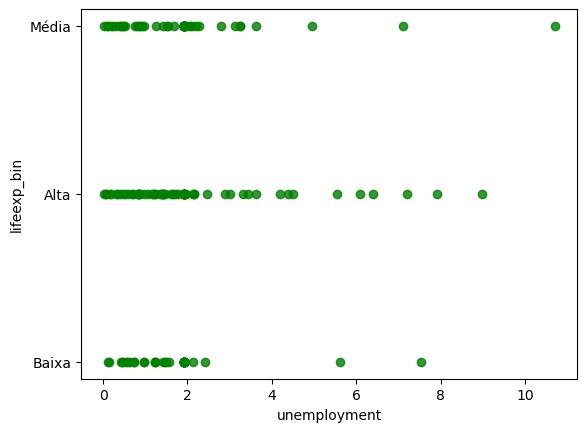

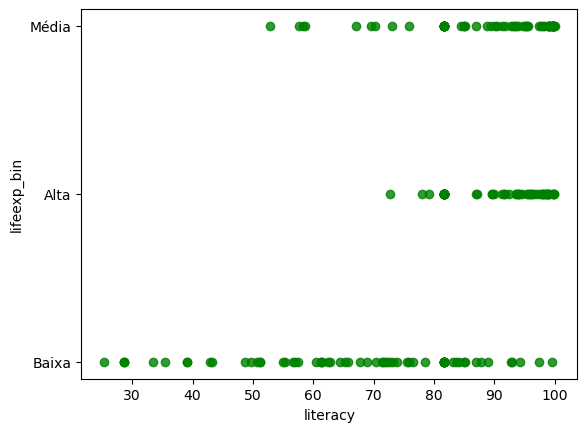

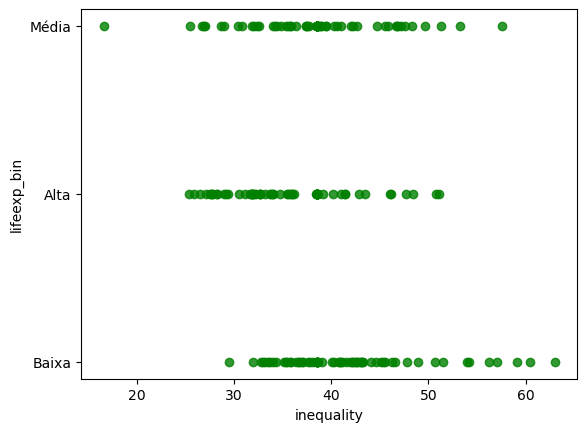

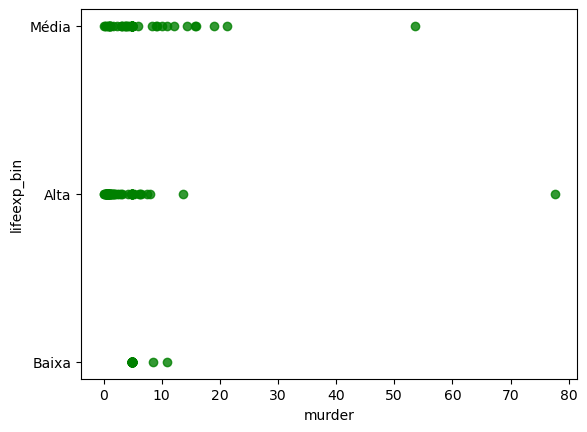

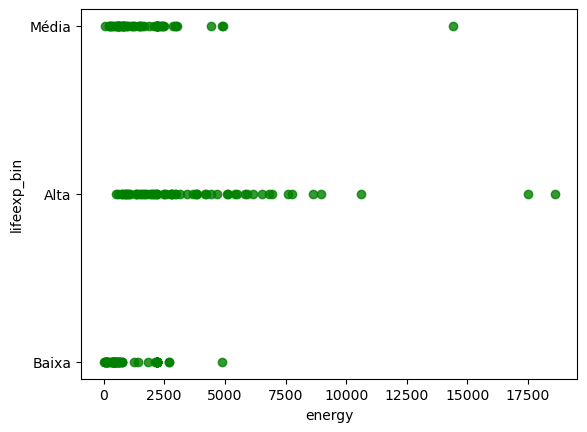

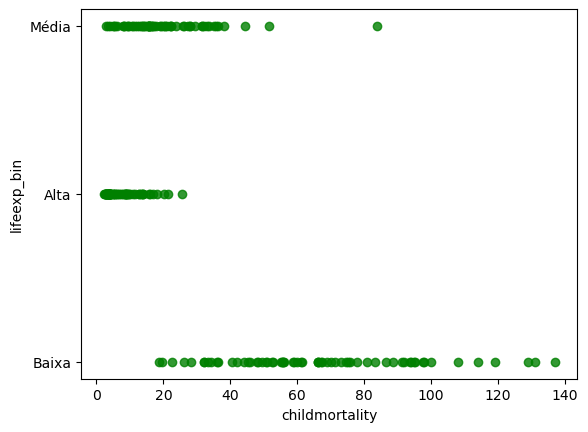

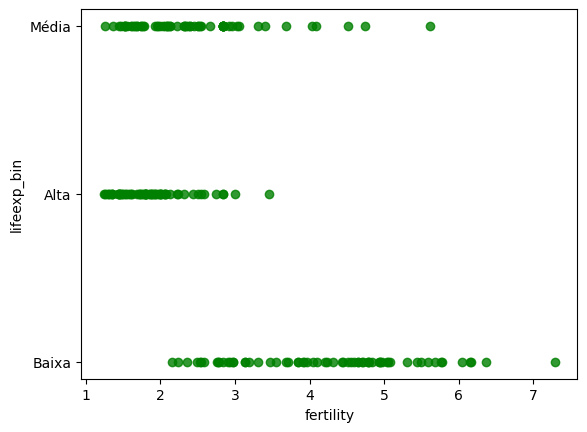

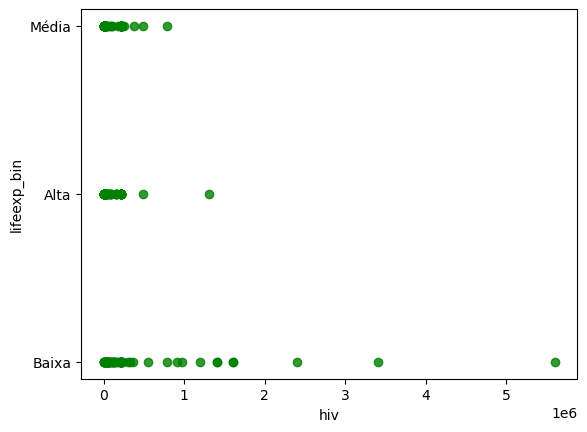

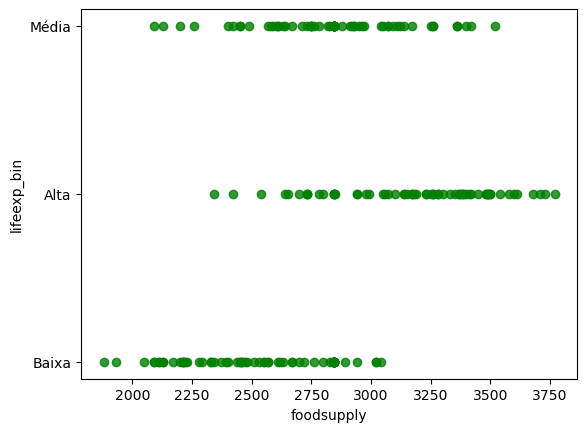

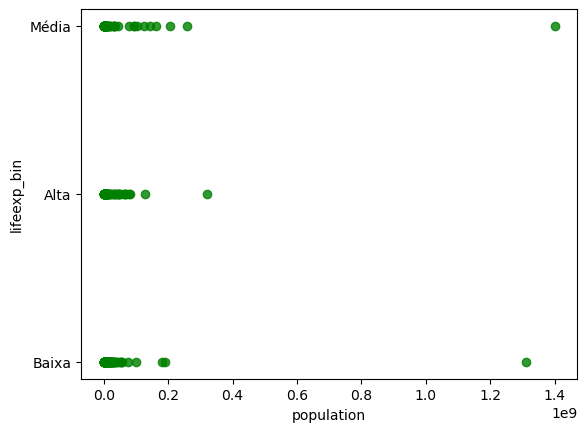

In [74]:
for i in X.columns:
    sns.regplot(x=df[i], y=df['lifeexp_bin'], data = df, fit_reg = False, color = 'green')
    plt.show()

#### 20º - Descobrir qual modelo teve a melhor performance

In [75]:
if max(dt_as_teste,rl_as_teste) == dt_as_teste:
    print("O modelo de Decision Tree teve uma performance melhor.")
else:
    print("O modelo de Regressão logística teve uma performance melhor.")

O modelo de Decision Tree teve uma performance melhor.
